In [1]:
#Load the data from train file
import pandas as pd
data=pd.read_csv('train.csv', sep=',').as_matrix()

In [2]:
import numpy as np
#split the data into training and testing data
data.shape
N = data.shape[0]
n_train = int((N*70)/100)
X_train = data[:n_train,1:]
Y_train = data[:n_train,0]

X_test = data[n_train:,1:]
Y_test = data[n_train:,0]

In [5]:
#All we are doing is for every class, 
#we compute the weights as average pixel value of all features.

C = 10
d = X_train.shape[1]

Y_train_matrix = np.zeros((n_train, C))
Y_train_matrix[np.arange(n_train), Y_train] = 1

theta = Y_train_matrix.T.dot(X_train)/np.sum(Y_train_matrix.T, axis=1).reshape(-1,1)

def predict(theta, X):
    return np.argmax(X.dot(theta.T), axis=1)

accuracy_train = np.mean(predict(theta, X_train)==Y_train)*100
accuracy_test = np.mean(predict(theta, X_test)==Y_test)*100
accuracy_train, accuracy_test

(61.962585034013607, 62.206349206349209)

In [4]:
X_Kaggle=pd.read_csv('test.csv', sep=',').as_matrix()
Y_Kaggle = predict(theta, X_Kaggle)
dataframe = pd.DataFrame({"ImageId":np.arange(28000)+1,"Label":Y_Kaggle})
dataframe.to_csv('submit_mean_method.csv', index=False)


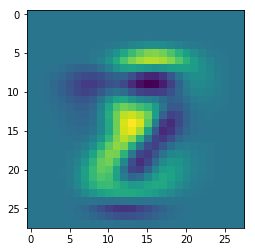

In [26]:
%matplotlib inline
#plot the image just so that you can see how they are

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

n1 = 8
n2 = 7
imgplot = plt.imshow((theta[n1]-theta[n2]).reshape(28,28))
